In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import numpy as np # linear algebra

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [39]:
x = df.drop('label' , axis='columns')
y = df['label']
x= x/255

In [8]:
X.values[3056]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58,  73, 163,
       215, 254, 215,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  36,  74, 22

5


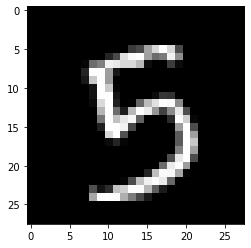

In [9]:
print(Y[3056])

import matplotlib.pyplot as plt

plt.imshow(X.values[3056].reshape(28,28) , cmap='gray')

plt.show()

train validate split

In [40]:
from sklearn.model_selection import train_test_split 
x_train, x_val , y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42 )

here we are going to use sklearn models to fit the data into a NN model that have 64 nuroal in the frist hidden layer, 32 nuroal in the second hidden layer, and 10 output layers

creating the model

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU, Dense

In [21]:
model = keras.Sequential([
    Dense(64, input_shape=(784,), activation='sigmoid'),
    Dense(32, activation=LeakyReLU(alpha=0.3)),
    Dense(32, activation=LeakyReLU(alpha=0.3)),

    Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model summary

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#ploting the model

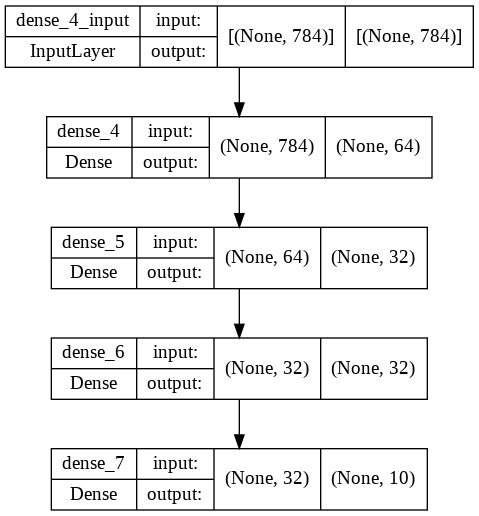

In [23]:
keras.utils.plot_model(model, show_shapes=True)

training the model using

In [41]:
model.fit(
    x= x_train,
    y= y_train,
    validation_data=(x_val, y_val),
    workers=10,
    epochs=10)

Epoch 1/10
1116/1116 [==============================] - 6s 5ms/step - loss: 0.1505 - accuracy: 0.9543 - val_loss: 0.1534 - val_accuracy: 0.9519
Epoch 2/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.1239 - accuracy: 0.9624 - val_loss: 0.1400 - val_accuracy: 0.9560
Epoch 3/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.1066 - accuracy: 0.9668 - val_loss: 0.1326 - val_accuracy: 0.9597
Epoch 4/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0925 - accuracy: 0.9709 - val_loss: 0.1368 - val_accuracy: 0.9594
Epoch 5/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.1313 - val_accuracy: 0.9595
Epoch 6/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.1262 - val_accuracy: 0.9621
Epoch 7/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.1284 - val_accuracy:

predicting the test values

In [44]:
xtest = x/255
ypre= model.predict(xtest)
ypre

array([[0.05681789, 0.02272058, 0.14346491, ..., 0.5567309 , 0.00788663,
        0.08953901],
       [0.06319699, 0.01855972, 0.1497944 , ..., 0.55268526, 0.00739521,
        0.08664686],
       [0.05136089, 0.02297689, 0.146664  , ..., 0.5752293 , 0.00717236,
        0.08444305],
       ...,
       [0.04834206, 0.01736826, 0.12245677, ..., 0.62235945, 0.00633737,
        0.08320032],
       [0.05556617, 0.02156893, 0.14741102, ..., 0.57066655, 0.00683537,
        0.08011764],
       [0.05108141, 0.01940305, 0.13256162, ..., 0.596587  , 0.00695387,
        0.08804781]], dtype=float32)

reading the submission file

In [52]:
sample = pd.read_csv('/content/my_submission.csv')
sample1 = sample.drop(columns= 'ImageId')
sample1[:5]

,Label
0,2
1,0
2,9
3,4
4,3


transform the prediction matrix into values

In [57]:
y_predicted = [np.argmax(i) for i in ypre]
y_predicted[:5]

[7, 7, 7, 7, 7]

In [58]:
print(len(sample1),'<-- sample prediction-->  ' ,  len(y_predicted))

28000 <-- sample prediction-->   42000


In [59]:
#saving the prediction values

In [60]:
y_predicted = pd.DataFrame(y_predicted)
newY = pd.concat([sample.drop(columns='Label'), y_predicted], axis = 1)

In [63]:
newY.columns=['ImageId', 'Label']
newY.head()

,ImageId,Label
0,1.0,7
1,2.0,7
2,3.0,7
3,4.0,7
4,5.0,7


evaluate the model in test data

In [64]:
model.evaluate(xtest,y_predicted)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.5523 - accuracy: 1.0000


[0.5522953271865845, 1.0]

save the values in CSV file

In [65]:
newY.to_csv('my_submission.csv', index= False)